In [1]:
from init import config

config 読み込み -> config/config.ini
config 読み込み -> ../config/config.ini


# 近似曲線の学習、描画
 - 多項式での近似曲線を学習し、係数、バイアスを取得。
 - 勾配式も同様に取得。
 - 描画。

In [2]:
# データ取得
from db import df
ticker = df.read_ticker(sec_by=60*10)
ltp = ticker[['ltp']]

2017-12-27 05:15:35,498 INFO sqlalchemy.engine.base.Engine SHOW VARIABLES LIKE 'sql_mode'
2017-12-27 05:15:35,500 INFO sqlalchemy.engine.base.Engine ()
2017-12-27 05:15:35,508 INFO sqlalchemy.engine.base.Engine SELECT DATABASE()
2017-12-27 05:15:35,511 INFO sqlalchemy.engine.base.Engine ()
2017-12-27 05:15:35,522 INFO sqlalchemy.engine.base.Engine show collation where `Charset` = 'utf8' and `Collation` = 'utf8_bin'
2017-12-27 05:15:35,526 INFO sqlalchemy.engine.base.Engine ()
2017-12-27 05:15:35,536 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS CHAR(60)) AS anon_1
2017-12-27 05:15:35,541 INFO sqlalchemy.engine.base.Engine ()
2017-12-27 05:15:35,555 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS CHAR(60)) AS anon_1
2017-12-27 05:15:35,557 INFO sqlalchemy.engine.base.Engine ()
2017-12-27 05:15:35,583 INFO sqlalchemy.engine.base.Engine SELECT CAST('test collated returns' AS CHAR CHARACTER SET utf8) COLLATE utf8_bin AS anon_1
2017-12-27 05

/usr/local/lib/python3.5/dist-packages/sqlalchemy/dialects/mysql/base.py:1576: Warning: (1287, "'@@tx_isolation' is deprecated and will be removed in a future release. Please use '@@transaction_isolation' instead")
  cursor.execute('SELECT @@tx_isolation')


In [10]:
import numpy as np
import learner
from plotter.plot import set_figure, plot
set_figure((16,5))

In [4]:
x  = np.array([i.timestamp() for i in ltp.index])
y = np.array(ltp[["ltp"]])

In [11]:
# 近似曲線多項式の生成
poly10, grad10 = learner.polyfit(x, y, 10)
# 近似式による y
poly10_y = np.array([poly10(i) for i in x])

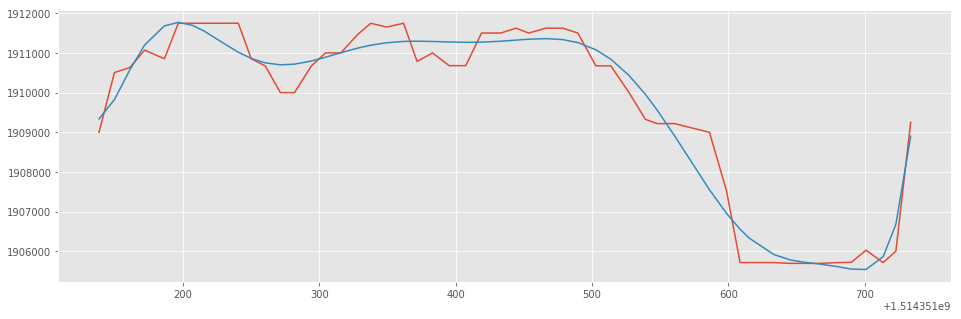

In [12]:
plot(x, y, "-", label="raw")
plot(x, poly10_y, "-", label="poly")

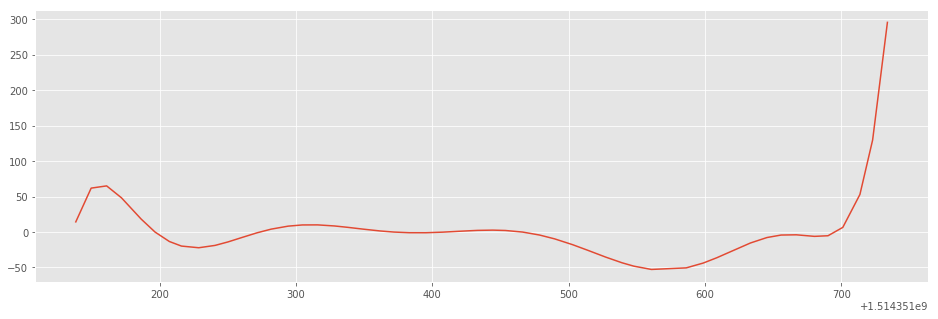

In [13]:
# 勾配
poly_dy= np.array([grad(i) for i in x])
plot(x, poly_dy, "-")

# 短期曲線、長期曲線
時間の幅を変化させて比較。

- 気付き
    - bitflyerの曲線は、それまでの曲線は更新されていない。  
    最新の点を何らかの処理で求めて、それを繋げている。  
    おそらく、時間で区切った累計の値になる。

In [74]:
import numpy as np
import learner
from plotter.plot import set_figure, plot
set_figure((16,5))

In [75]:
def time_ltp(df):
    x = np.array([i.timestamp() for i in df.index])
    y = np.array(df[["ltp"]])
    return x,y
    
def cal_poly_ltp(df, deg):
    x, y = time_ltp(df)
    # 近似曲線多項式の生成
    poly, grad = learner.polyfit(x, y, deg)
    # 近似式による y
    poly_y = np.array([poly(i) for i in x])
    return x, poly_y

2017-12-27 06:22:45,103 INFO sqlalchemy.engine.base.Engine DESCRIBE `SELECT * FROM ticker `
2017-12-27 06:22:45,104 INFO sqlalchemy.engine.base.Engine ()
2017-12-27 06:22:45,118 INFO sqlalchemy.engine.base.Engine ROLLBACK
2017-12-27 06:22:45,124 INFO sqlalchemy.engine.base.Engine SELECT * FROM ticker 
2017-12-27 06:22:45,127 INFO sqlalchemy.engine.base.Engine ()
2017-12-27 06:22:45,763 INFO sqlalchemy.engine.base.Engine DESCRIBE `SELECT * FROM ticker `
2017-12-27 06:22:45,768 INFO sqlalchemy.engine.base.Engine ()
2017-12-27 06:22:45,772 INFO sqlalchemy.engine.base.Engine ROLLBACK
2017-12-27 06:22:45,812 INFO sqlalchemy.engine.base.Engine SELECT * FROM ticker 
2017-12-27 06:22:45,814 INFO sqlalchemy.engine.base.Engine ()


(1514353970.9630001, 1514355759.687)

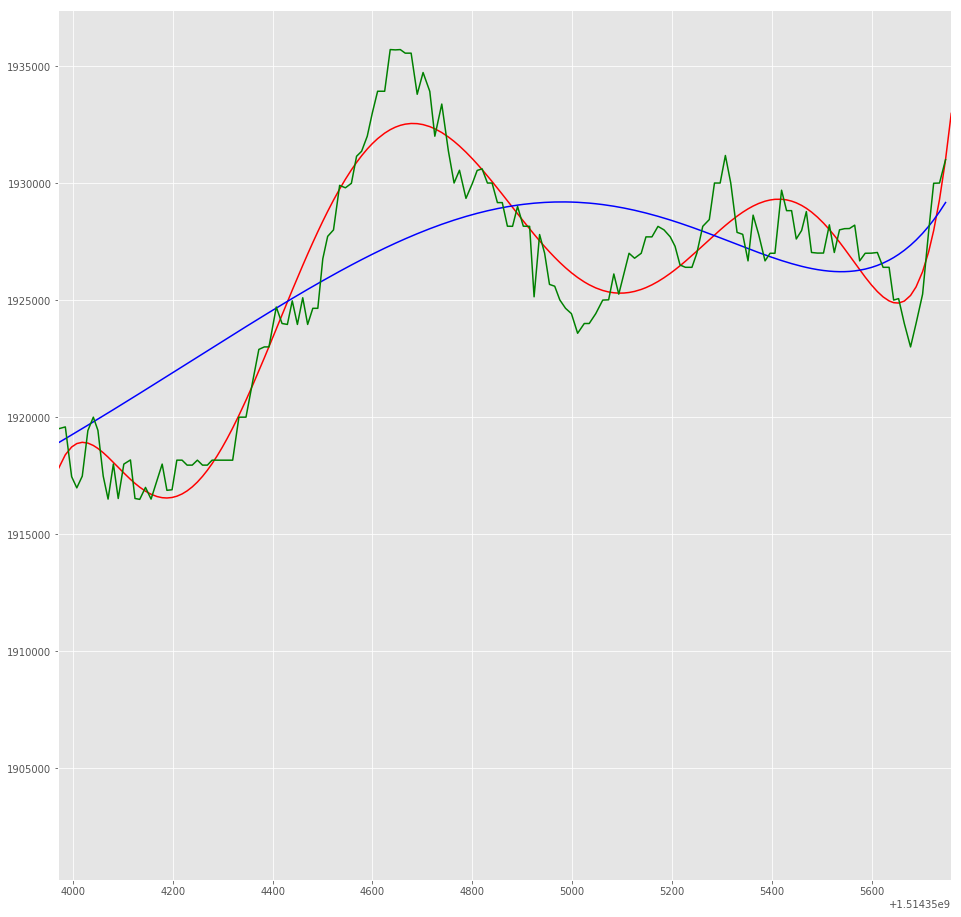

In [93]:
%matplotlib inline
long_ticker = df.read_ticker(sec_by=60*60)
short_ticker = df.read_ticker(sec_by=60*30)

_, long_y = time_ltp(long_ticker)
long_x, long_poly_y  = cal_poly_ltp(long_ticker, 7)
short_x, short_poly_y  = cal_poly_ltp(short_ticker, 7)

from plotter.plot import plt
set_figure((16, 16))
plot(short_x, short_poly_y, "r-", long_x, long_poly_y, "b-", long_x, long_y, "g-")
plt.xlim([short_x.min(), short_x.max()])

2017-12-27 07:12:13,219 INFO sqlalchemy.engine.base.Engine DESCRIBE `SELECT * FROM ticker `
2017-12-27 07:12:13,220 INFO sqlalchemy.engine.base.Engine ()
2017-12-27 07:12:13,232 INFO sqlalchemy.engine.base.Engine ROLLBACK
2017-12-27 07:12:13,244 INFO sqlalchemy.engine.base.Engine SELECT * FROM ticker 
2017-12-27 07:12:13,246 INFO sqlalchemy.engine.base.Engine ()
326 frames
■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■simulate done


# 最新の状況算出
- データ取得
- 短期曲線、長期曲線の状況把握
- 最新の点ではどうなるか予測